# 1. Задание
Даны два вектора в трехмерном пространстве: (10,10,10) и (0,0,-10) <br>
1. Найдите их сумму. (на листочке) <br>

$
\overrightarrow{A} = [10, 10, 10] \\
\overrightarrow{B} = [0, 0, -10]
$

$A = \sqrt{10^2 + 10^2 + 10^2} = \sqrt{300} = \sqrt{3 \cdot 100} = 10\sqrt{3}$

$B = \sqrt{0^2 + 0^2 - 10^2} = \sqrt{100} = 10$

$C = 10\sqrt{3} + 10$

2. Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. (в программе)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def vector_len(vector):
    return (vector**2).sum() ** 0.5

A = np.array([10, 10, 10])
B = np.array([0, 0, -10])

print("length vector A =", vector_len(A))
print("length vector B =", vector_len(B))

length vector A = 17.320508075688775
length vector B = 10.0


# 2. Задание (на листочке)
Почему прямые не кажутся перпендикулярными? (см.ролик)

In [3]:
def line(x, k, b):
    return k * x + b

def plot_graphs(x, y1, y2, figsize=(6, 6), turn=False):
    axis = np.concatenate([x, y1, y2])
    axis = int(max(abs(axis))) + 1
    axis = np.arange(-axis, axis+1)
    
    plt.figure(figsize=figsize)
    
    plt.plot(axis, np.zeros_like(axis), c="gray", linestyle="--")
    plt.plot(np.zeros_like(axis), axis, c="gray", linestyle="--")
    
    if turn:
        plt.plot(y1, x)
        plt.plot(y2, x)
    else:
        plt.plot(x, y1)
        plt.plot(x, y2)
    
    plt.xticks(axis)
    plt.yticks(axis)
    
    plt.grid()

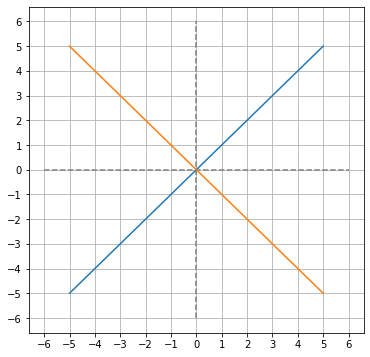

In [4]:
x = np.linspace(-5, 5, 21)
b = 0

"""
k - угловой коеффициент, чем он больше тем, больше прямая отклонена от оси X
по этому если мы уберем влияние k сделав его = 1, то наклона не произойдет и мы увидем перпендикулярные прямые
"""
k = 1

plot_graphs(x,
            y1 = line_equation(x, k=k, b=b), 
            y2 = line_equation(x, k=-1/k, b=b))

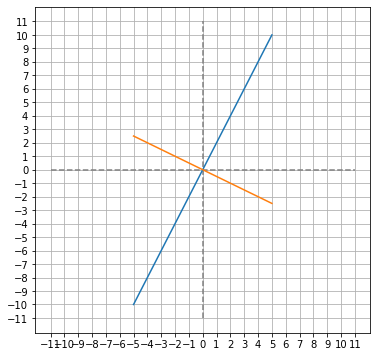

In [5]:
"""
если мы поставим k = 2, то график начнет вращаться вокруг точки пересечения, 
а значения оси Y будут увелины в 2 раза, и график сплюснется
но если мы увеличим размер самого графика так же в 2 раза, то линии снова станут перепендикулярными
"""
k = 2

plot_graphs(x,
            y1 = line_equation(x, k=k, b=b), 
            y2 = line_equation(x, k=-1/k, b=b))

__Ответ:__ прямые не кажутся перпендикулярными, потому что значения Y при k = 3 увеличивается в 3 раза, при этом сами габариты графика остаются неизменными, график сплющивается, перпендикулярность нарушается.

# 3. Задание (в программе)
Напишите код на Python, реализующий построение графиков: <br>

## окружности

Возьмем за основу уравнение элипса, так как по сути это просто растянутый круг)

$\cfrac{x^2}{a^2} + \cfrac{y^2}{b^2} = 1$

X мы будем задавать вручную, а Y находить, поэтому нужно преобразовать это уравнение, для нахождение Y

$\cfrac{y^2}{b^2} = 1 - \cfrac{x^2}{a^2}$

$y^2 = b^2 - \cfrac{(x \cdot b)^2}{a^2}$

$y = \sqrt{b^2 - \cfrac{(x \cdot b)^2}{a^2}}$

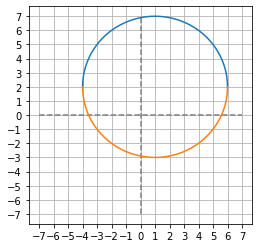

In [6]:
def oval(a, b, x0=0, y0=0):
    x = np.linspace(-a, a, 1000)
    y = (b**2 - ((x * b)**2) / a**2)**0.5
    
    return x+x0, y+y0, -y+y0

x, y1, y2 = oval(5, 5, 1, 2)

plot_graphs(x, y1, y2, figsize=(4, 4))

## эллипса

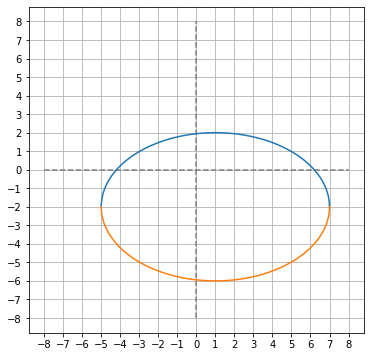

In [7]:
x, y1, y2 = oval(6, 4, 1, -2)

plot_graphs(x, y1, y2)

## гиперболы

С гиперболой будет проще задавать Y и на его основе генерировать X<br>
Преобразуем уравнение гиперболы для этого:<br>
$\cfrac{x^2}{a^2} - \cfrac{y^2}{b^2} = 1$

$\cfrac{x^2}{a^2} = 1 + \cfrac{y^2}{b^2}$

$x^2 = a^2 + \cfrac{(a \cdot y)^2}{b^2}$

$x = \sqrt{a^2 + \cfrac{(a \cdot y)^2}{b^2}}$

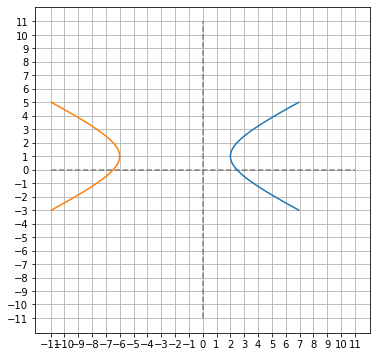

In [8]:
def hyperbola(a, b, x0=0, y0=0):
    y = np.linspace(-a, a, 1000)
    x = (a**2 + ((a * y)**2) / b**2)**0.5
    
    return y+x0, x+y0, -x+y0


y, x1, x2 = hyperbola(4, 2, 1, -2)

"""Данный график будет повернут на 90 градусов - это надо учесть"""
plot_graphs(y, x1, x2, turn=True)

# 4. Задание (на листочке)

## 1) Пусть задана плоскость:

$A \cdot x + B \cdot y + C \cdot z + D = 0$

Напишите уравнение плоскости, параллельной данной и проходящей через начало координат.

__Ответ:__<br>
$D = 0$ - наверное

## 2)  Пусть задана плоскость:

$A_1 \cdot x + B_1 \cdot y + C_1 \cdot z + D_1 = 0$

и прямая:<br>
$\cfrac{x - x_1}{x_2 - x_1} = \cfrac{y - y_1}{y_2 - y_1} = \cfrac{z - z_1}{z_2 - z_1}$

Как узнать, принадлежит прямая плоскости или нет?

__Ответ:__<br>
Точно не знаю почему, но думаю, что если создать еще 1 плоскость <br>
$A \cdot x + B \cdot y + C \cdot z + D = 0$

то, возможно, линия с пересечения плоскостей будет лежать на них обоих, а значит и на первой тоже

ps."Это как я понял, на самом деле ничего не ясно и очень абстрактно с этими 2мя последними задачами"

# 5. Задание (в программе)

1) Нарисуйте трехмерный график двух параллельных плоскостей.

In [9]:
def plot_graphs3D(x, y, z1, z2, turnx=False, figsize=(8, 8)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')
    
    axis = [i.reshape(-1) for i in (x, y, z1[~np.isnan(z1)], z2[~np.isnan(z2)])]
    axis = np.concatenate(axis)
    axis = int(max(abs(axis)))
    
    axis = np.arange(-axis, axis+1)
    
    ax.plot(axis, np.zeros_like(axis), np.zeros_like(axis), c='gray', linestyle='--')
    ax.plot(np.zeros_like(axis), axis, np.zeros_like(axis), c='gray', linestyle='--')
    ax.plot(np.zeros_like(axis), np.zeros_like(axis), axis, c='gray', linestyle='--')
    
    if turnx:
        ax.plot_wireframe(z2, x, y, color='orange')
        ax.plot_wireframe(z1, x, y)
    else:
        ax.plot_wireframe(x, y, z2, color='orange')
        ax.plot_wireframe(x, y, z1)

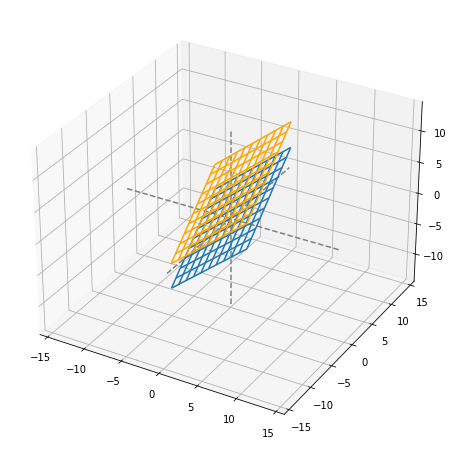

In [10]:
def plane3D(a=1, b=1, c=1, d=0):
    x = np.linspace(-5, 5, 11)
    y = np.linspace(-5, 5, 11)
    x, y = np.meshgrid(x, y)
    z = x*a + y*b + d
    
    return x, y, z

x, y, z = plane3D()
plot_graphs3D(x, y, z, z+4)

2) Нарисуйте трехмерный график двух любых поверхностей второго порядка.

<ipython-input-11-21c4f4bee312>:5: RuntimeWarning: invalid value encountered in sqrt
  z = (c**2 - ((x*c)**2) / a**2 - ((y*c)**2) / b**2)**0.5


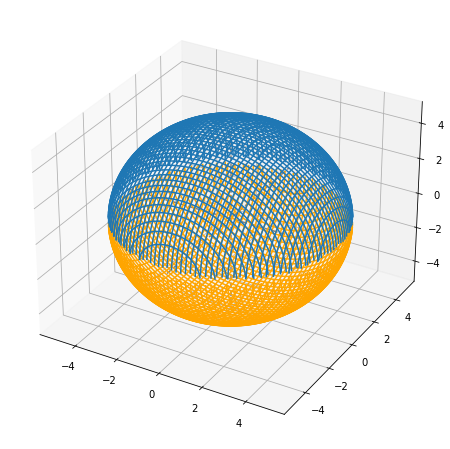

In [11]:
def oval3D(a, b, c, x0=0, y0=0, z0=0):
    x = np.linspace(-a, a, 1000)
    y = np.linspace(-b, b, 1000)
    x, y = np.meshgrid(x, y)
    z = (c**2 - ((x*c)**2) / a**2 - ((y*c)**2) / b**2)**0.5
    
    return x+x0, y+y0, z+z0, -z+z0

x, y, z1, z2 = oval3D(5, 5, 5)

plot_graphs3D(x, y, z1, z2)

<ipython-input-11-21c4f4bee312>:5: RuntimeWarning: invalid value encountered in sqrt
  z = (c**2 - ((x*c)**2) / a**2 - ((y*c)**2) / b**2)**0.5


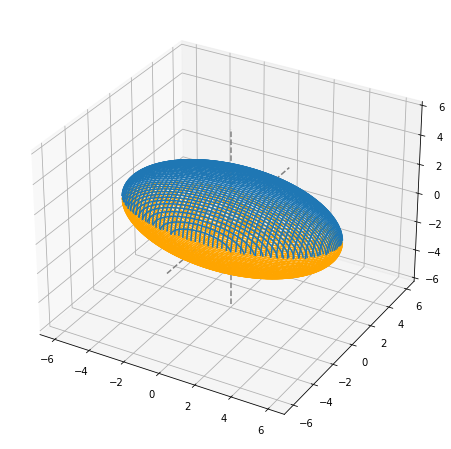

In [12]:
x, y, z1, z2 = oval3D(6, 3, 3)

plot_graphs3D(x, y, z1, z2)

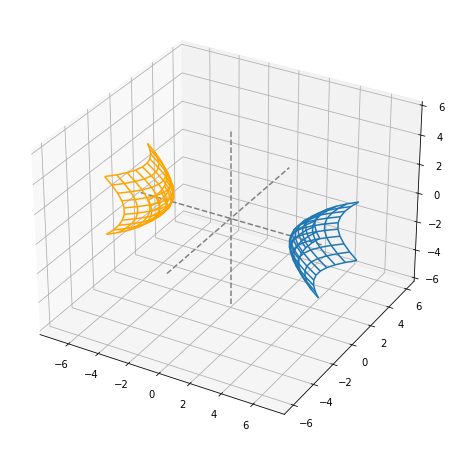

In [13]:
def hyperbola(a, b, c):
    y = np.linspace(-b, b, 10)
    z = np.linspace(-c, c, 10)
    y, z = np.meshgrid(y, z)
    x = (a**2 + ((a*y)**2) / b**2 + ((a*z)**2) / c**2)**0.5
    
    return y, z, x, -x

y, z, x1, x2 = hyperbola(4, 2, 2)

plot_graphs3D(y, z, x1, x2, turnx=True)